In [1]:
import cv2
from myutils import MyUtils
from mynbutils import show_cv2_img

In [11]:
def findnshow_contours(image_bi, inv: bool = False):
  img = cv2.bitwise_not(img_bi) if inv else image_bi
  
  # Tìm contour
  contours, hierarchy = cv2.findContours(
    img, 
    mode=cv2.RETR_EXTERNAL,
    #mode=cv2.RETR_TREE,       # Lấy tất cả contour và cấu trúc phân cấp
    method=cv2.CHAIN_APPROX_SIMPLE  # Phương pháp xấp xỉ contour
  )

  # Tạo ảnh màu để vẽ contour (nếu ảnh gốc là grayscale)
  img_out = cv2.cvtColor(image_bi, cv2.COLOR_GRAY2BGR)

  # Vẽ contour lên ảnh
  cv2.drawContours(
    img_out, 
    contours, 
    contourIdx=-1,           # -1: vẽ tất cả contour
    color=(0, 255, 0),       # Màu xanh lá (BGR)
    thickness=2              # Độ dày đường viền
  )

  return img_out

In [23]:
img = cv2.imread('./data/test_contour2.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img_bi = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

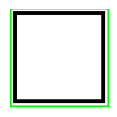

In [24]:
img_c = findnshow_contours(img_bi)
show_cv2_img(img_c)